# Installation of libraries

In [ ]:
!pip install --upgrade scikit-learn

In [ ]:
#installation of libraries
import math
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
import plotly.express as px
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
from datetime import timedelta
from os import replace
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from sklearn.ensemble import HistGradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression, RidgeClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.dummy import DummyClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import GridSearchCV

# Importing tables from google drive

In [ ]:
#import from google drive
!gdown 1TLD79damXSqYHkUUMU754HUmKkYnK1jG

!gdown 1Nza3vUOL7WalKPG32BVQrso7J_Oeqj6x

!gdown 18B3pWhLVitH8H7Vaq88py19aaT2TqSeZ

Downloading...
From: https://drive.google.com/uc?id=1TLD79damXSqYHkUUMU754HUmKkYnK1jG
To: /content/base_clientes.csv
100% 5.25M/5.25M [00:00<00:00, 223MB/s]
Downloading...
From: https://drive.google.com/uc?id=1Nza3vUOL7WalKPG32BVQrso7J_Oeqj6x
To: /content/base_hist_churn.csv
100% 563k/563k [00:00<00:00, 137MB/s]
Downloading...
From: https://drive.google.com/uc?id=18B3pWhLVitH8H7Vaq88py19aaT2TqSeZ
To: /content/base_precos.csv
100% 22.6M/22.6M [00:00<00:00, 214MB/s]


# Defining the dataframes

In [ ]:
#important and defining the dataframes
data_costumers = pd.read_csv('/content/base_clientes.csv')

data_prices = pd.read_csv('/content/base_precos.csv')

data_churns = pd.read_csv('/content/base_hist_churn.csv', ',')

<ipython-input-43-21eb1c7916b2>:6: FutureWarning: In a future version of pandas all arguments of read_csv except for the argument 'filepath_or_buffer' will be keyword-only.
  data_churns = pd.read_csv('/content/base_hist_churn.csv', ',')


# Business analysis

In [ ]:
# Analyzing null values
data_costumers.isnull().sum()

id                              0
activity_new                11899
campaign_disc_ele           20120
channel_sales                5274
cons_12m                        0
cons_gas_12m                    0
cons_last_month                 0
date_activ                      0
date_end                        2
date_first_activ            15735
date_modif_prod               202
date_renewal                   44
forecast_base_bill_ele      15735
forecast_base_bill_year     15735
forecast_bill_12m           15735
forecast_cons               15735
forecast_cons_12m               0
forecast_cons_year              0
forecast_discount_energy      150
forecast_meter_rent_12m         0
forecast_price_energy_p1      150
forecast_price_energy_p2      150
forecast_price_pow_p1         150
has_gas                         0
imp_cons                        0
margin_gross_pow_ele           15
margin_net_pow_ele             15
nb_prod_act                     0
net_margin                     18
num_years_anti

In [ ]:
# Converting dates and handling invalid ones
data_costumers['date_activ'] = pd.to_datetime(data_costumers['date_activ'], format='%d/%m/%Y', errors='coerce')

# Creating a new column in the DataFrame to store only the years from the dates
data_costumers['year'] = data_costumers['date_activ'].dt.year

# Using the value_counts method to count activations per year and storing the results in a series
ativacoes_por_ano = data_costumers['year'].value_counts()

# Finding the years with the most activations in descending order
pri_ativacoes = ativacoes_por_ano.index[0]
seg_ano_ativacoes = ativacoes_por_ano.index[1]
ter_ano_ativacoes  = ativacoes_por_ano.index[2]
qua_ano_ativacoes  = ativacoes_por_ano.index[3]
qui_ano_ativacoes  = ativacoes_por_ano.index[4]
sext_ano_ativacoes  = ativacoes_por_ano.index[5]
set_ano_ativacoes  = ativacoes_por_ano.index[6]
oit_ano_ativacoes  = ativacoes_por_ano.index[7]
nov_ano_ativacoes  = ativacoes_por_ano.index[8]
d_ano_ativacoes  = ativacoes_por_ano.index[9]
dpri_ativacoes  = ativacoes_por_ano.index[10]
dseg_ativacoes  = ativacoes_por_ano.index[11]
dter_ativacoes  = ativacoes_por_ano.index[12]
dqua_ativacoes  = ativacoes_por_ano.index[13]

# Filtering the data for the first year with the most activations and calculating the sum of 'net_margin' column values
n_ati_pri_ano = ativacoes_por_ano.iloc[0]
n_ati_seg_ano = ativacoes_por_ano.iloc[1]
n_ati_terc_ano = ativacoes_por_ano.iloc[2]
n_ati_qua_ano  = ativacoes_por_ano.iloc[3]
n_ati_qui_ano  = ativacoes_por_ano.iloc[4]
n_ati_sext_ano  = ativacoes_por_ano.iloc[5]
n_ati_set_ano  = ativacoes_por_ano.iloc[6]
n_ati_oit_ano  = ativacoes_por_ano.iloc[7]
n_ati_nov_ano  = ativacoes_por_ano.iloc[8]
n_ati_d_ano  = ativacoes_por_ano.iloc[9]
n_ati_dpri_ano  = ativacoes_por_ano.iloc[10]
n_ati_dseg_ano  = ativacoes_por_ano.iloc[11]
n_ati_dterc_ano  = ativacoes_por_ano.iloc[12]
n_ati_dqua_ano  = ativacoes_por_ano.iloc[13]

# Filtering the data for the years with the highest number of activations and calculating the sum of the 'net_margin' column values
dados_pri_ano = data_costumers[data_costumers['year'] == pri_ativacoes]['net_margin']
dados_seg_ano = data_costumers[data_costumers['year'] == seg_ano_ativacoes]['net_margin']
dados_terc_ano = data_costumers[data_costumers['year'] == ter_ano_ativacoes]['net_margin']
dados_qua_ano = data_costumers[data_costumers['year'] == qua_ano_ativacoes]['net_margin']
dados_qui_ano = data_costumers[data_costumers['year'] == qui_ano_ativacoes]['net_margin']
dados_sext_ano = data_costumers[data_costumers['year'] == sext_ano_ativacoes]['net_margin']
dados_set_ano = data_costumers[data_costumers['year'] == set_ano_ativacoes]['net_margin']
dados_oit_ano = data_costumers[data_costumers['year'] == oit_ano_ativacoes]['net_margin']
dados_nov_ano = data_costumers[data_costumers['year'] == nov_ano_ativacoes]['net_margin']
dados_d_ano = data_costumers[data_costumers['year'] == d_ano_ativacoes]['net_margin']
dados_dpri_ano = data_costumers[data_costumers['year'] == dpri_ativacoes]['net_margin']
dados_dseg_ano = data_costumers[data_costumers['year'] == dseg_ativacoes]['net_margin']
dados_dterc_ano = data_costumers[data_costumers['year'] == dter_ativacoes]['net_margin']
dados_dqua_ano = data_costumers[data_costumers['year'] == dqua_ativacoes]['net_margin']

# Print the data corresponding to the years with the most activations and the sum of net income
print(f"Dados do primeiro ano com mais ativações ({pri_ativacoes}):", dados_pri_ano.sum())
print(f"\nDados do segundo ano com mais ativações ({seg_ano_ativacoes}):", dados_seg_ano.sum())
print(f"\nDados do terceiro ano com mais ativações ({ter_ano_ativacoes}):", dados_terc_ano.sum())
print(f"\nDados do quarto ano com mais ativações ({qua_ano_ativacoes}):", dados_qua_ano.sum())
print(f"\nDados do quinto ano com mais ativações ({qui_ano_ativacoes}):", dados_qui_ano.sum())
print(f"\nDados do sexto ano com mais ativações ({sext_ano_ativacoes}):", dados_sext_ano.sum())
print(f"\nDados do setimo ano com mais ativações ({set_ano_ativacoes}):", dados_set_ano.sum())
print(f"\nDados do oitavo ano com mais ativações ({oit_ano_ativacoes}):", dados_oit_ano.sum())
print(f"\nDados do nono ano com mais ativações ({nov_ano_ativacoes}):", dados_nov_ano.sum())
print(f"\nDados do decimo ano com mais ativações ({d_ano_ativacoes}):", dados_d_ano.sum())
print(f"\nDados do decimo primeiro ano com mais ativações ({dpri_ativacoes}):", dados_dpri_ano.sum())
print(f"\nDados do decimo segundo ano com mais ativações ({dseg_ativacoes}):", dados_dseg_ano.sum())
print(f"\nDados do decimo terceiro ano com mais ativações ({dter_ativacoes}):", dados_dterc_ano.sum())
print(f"\nDados do decimo quarto ano com mais ativações ({dqua_ativacoes}):", dados_dqua_ano.sum())

Dados do primeiro ano com mais ativações (2018.0): 1219540.15

Dados do segundo ano com mais ativações (2016.0): 914226.7

Dados do terceiro ano com mais ativações (2017.0): 777494.3300000001

Dados do quarto ano com mais ativações (2015.0): 534917.73

Dados do quinto ano com mais ativações (2019.0): 453957.97

Dados do sexto ano com mais ativações (2014.0): 124733.26000000001

Dados do setimo ano com mais ativações (2011.0): 157255.47999999998

Dados do oitavo ano com mais ativações (2010.0): 92193.51999999999

Dados do nono ano com mais ativações (2013.0): 38850.84

Dados do decimo ano com mais ativações (2012.0): 22921.730000000003

Dados do decimo primeiro ano com mais ativações (2009.0): 23378.58

Dados do decimo segundo ano com mais ativações (2006.0): 1703.7

Dados do decimo terceiro ano com mais ativações (2007.0): 412.08

Dados do decimo quarto ano com mais ativações (2020.0): 307.89


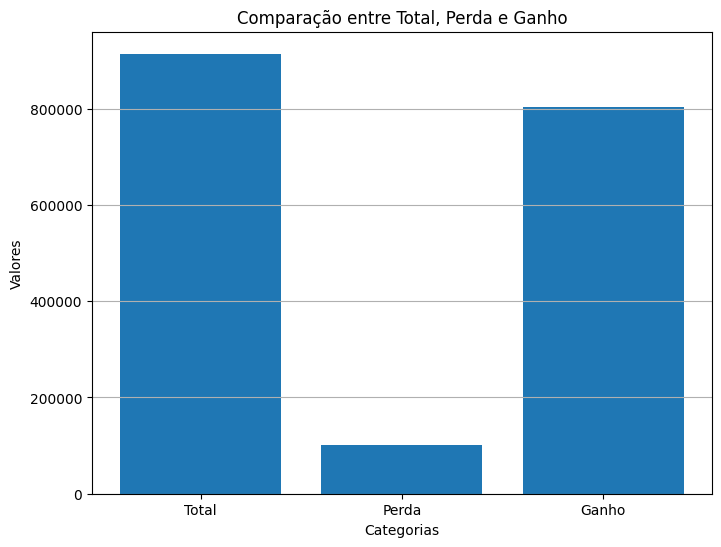

100564.93699999999


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Calculating the total, loss and gain as follows:
total0 = dados_pri_ano.sum()
perda0 = (dados_pri_ano.sum()) * 0.11
ganho0 = (dados_pri_ano.sum()) * 0.88

# Creating a DataFrame for the bar chart data
data = {'Categorias': ['Total', 'Perda', 'Ganho'],
        'Valores': [total, perda, ganho]}

df_bar = pd.DataFrame(data)

# Plotting a bar chart
plt.figure(figsize=(8, 6))
plt.bar(df_bar['Categorias'], df_bar['Valores'])
plt.title('Comparação entre Total, Perda e Ganho')
plt.xlabel('Categorias')
plt.ylabel('Valores')
plt.grid(axis='y')
plt.show()
print(perda)

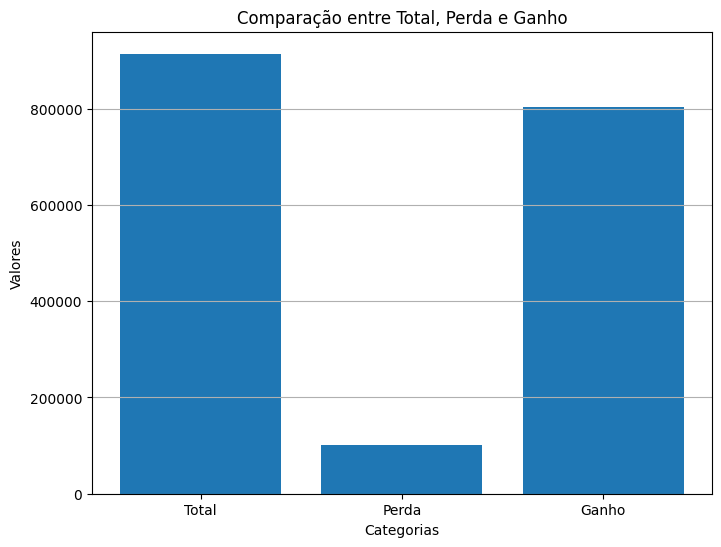

100564.93699999999


In [ ]:
# Calculating the total, loss and gain as follows:
total = dados_seg_ano.sum()
perda = (dados_seg_ano.sum()) * 0.11
ganho = (dados_seg_ano.sum()) * 0.88

# Creating a DataFrame for the bar chart data
data = {'Categorias': ['Total', 'Perda', 'Ganho'],
        'Valores': [total, perda, ganho]}

df_bar = pd.DataFrame(data)

# Plotting a bar chart
plt.figure(figsize=(8, 6))
plt.bar(df_bar['Categorias'], df_bar['Valores'])
plt.title('Comparação entre Total, Perda e Ganho')
plt.xlabel('Categorias')
plt.ylabel('Valores')
plt.grid(axis='y')
plt.show()
print(perda)

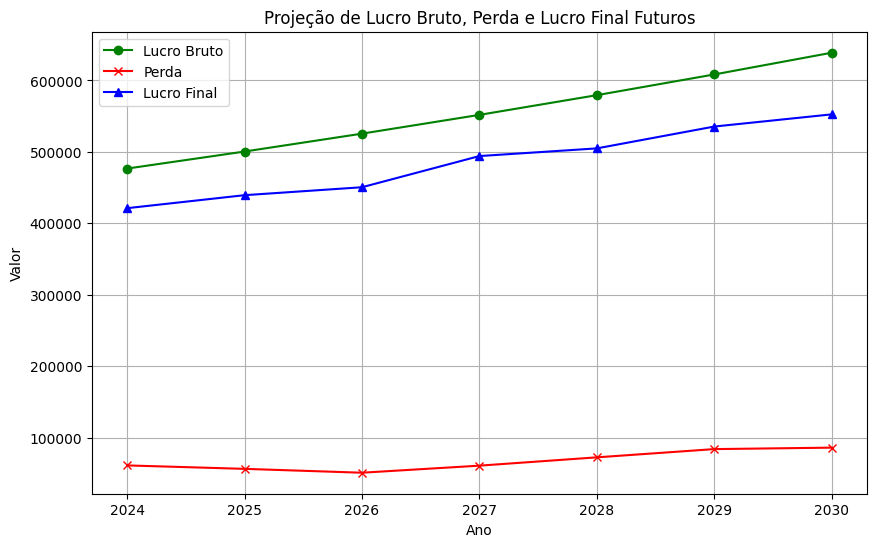

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Gross profit data for previous years
anos_anteriores = range(2009, 2019)  # profit data from 2009 to 2019
lucro_liquido_anterior = [23378.58, 92193.51999999999, 157255.47999999998, 22921.730000000003, 38850.84, 124733.26000000001,  534917.73, 914226.7, 777494.3300000001, 1219540.15, 453957.97]

# Calculating the final profit (88% of Gross profit)
lucro_final_anterior = [lucro * 0.88 for lucro in lucro_liquido_anterior]

# Calculate the loss (11% of Gross profit)
perda_anterior = [lucro * 0.11 for lucro in lucro_liquido_anterior]

# Projecting the data for the next years (2024 to 2031)
anos_futuros = range(2024, 2031)
lucro_liquido_futuro = []
lucro_final_futuro = []
perda_futura = []

# Assume Gross Profit increases by 5% each year
taxa_crescimento_lucro_liquido = 0.05

# Assume that the final profit and loss ratios vary randomly with a standard deviation of 2%
desvio_padrao = 0.02

for ano in anos_futuros:
    lucro_liquido_anterior = lucro_liquido_anterior[-12:]  # Get the last 12 months
    lucro_liquido_projetado = lucro_liquido_anterior[-1] * (1 + taxa_crescimento_lucro_liquido)

    # Generating random proportions for loss and final profit with a standard deviation of 2%
    proporcao_perda = np.random.normal(0.11, desvio_padrao)
    proporcao_lucro_final = np.random.normal(0.88, desvio_padrao)

    perda_projetada = lucro_liquido_projetado * proporcao_perda
    lucro_final_projetado = lucro_liquido_projetado * proporcao_lucro_final

    lucro_liquido_futuro.append(lucro_liquido_projetado)
    lucro_final_futuro.append(lucro_final_projetado)
    perda_futura.append(perda_projetada)

    lucro_liquido_anterior.append(lucro_liquido_projetado)

# Creating a DataFrame with the projected data
data_futuro = {'Ano': anos_futuros, 'Lucro Bruto': lucro_liquido_futuro, 'Lucro Final': lucro_final_futuro, 'Perda': perda_futura}
df_futuro = pd.DataFrame(data_futuro)

# Plotting the line graph
plt.figure(figsize=(10, 6))

plt.plot(df_futuro['Ano'], df_futuro['Lucro Bruto'], label='Lucro Bruto', color='green', marker='o')
plt.plot(df_futuro['Ano'], df_futuro['Perda'], label='Perda', color='red', marker='x')
plt.plot(df_futuro['Ano'], df_futuro['Lucro Final'], label='Lucro Final', color='blue', marker='^')

plt.title('Projeção de Lucro Bruto, Perda e Lucro Final Futuros')
plt.xlabel('Ano')
plt.ylabel('Valor')
plt.legend()
plt.grid(True)

plt.show()


In [ ]:
# Final summary of the projection, here we can observe the estimated value that the customer will lose over the next 7 years if he does not avoid the evasion of his customer list
perda_total_2024_2031 = sum(perda_futura)

print(f"Perda total entre 2024 e 2031: {perda_total_2024_2031}")

Perda total entre 2024 e 2031: 472181.24506717804
